# Hugging Face Datasets

The HF Datasets allows you to quickly download and cache datasets.

You can browse the datasets [here](https://huggingface.co/datasets).

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

# This command downloads and caches the dataset, by default in ~/.cache/huggingface/datasets.
raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

We get a `DatasetDict` object which is a sort of a dictionary containing each split of our dataset: the training set, the validation set, and the test set.

Each of those contains several columns (sentence1, sentence2, label, and idx) and a variable number of rows, which are the number of elements in each set (so, there are 3,668 pairs of sentences in the training set, 408 in the validation set, and 1,725 in the test set).

We can access each split by indexing with the split's name.

In [ ]:
raw_datasets["train"]

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 3668
})

This split is an instance of the `Dataset` class with columns (here: `'sentence1', 'sentence2', 'label', 'idx'`) and number of rows.

We can access an element in the `Dataset` class using its numeric index. Or, you can access a slice of your dataset.



In [ ]:
raw_datasets["train"][6]

{'sentence1': 'The Nasdaq had a weekly gain of 17.27 , or 1.2 percent , closing at 1,520.15 on Friday .',
 'sentence2': 'The tech-laced Nasdaq Composite .IXIC rallied 30.46 points , or 2.04 percent , to 1,520.15 .',
 'label': 0,
 'idx': 6}

In [ ]:
raw_datasets["train"][10:15]

{'sentence1': ['Legislation making it harder for consumers to erase their debts in bankruptcy court won overwhelming House approval in March .',
  'The Nasdaq composite index increased 10.73 , or 0.7 percent , to 1,514.77 .',
  'But he added group performance would improve in the second half of the year and beyond .',
  "He told The Sun newspaper that Mr. Hussein 's daughters had British schools and hospitals in mind when they decided to ask for asylum .",
  'Gyorgy Heizler , head of the local disaster unit , said the coach was carrying 38 passengers .'],
 'sentence2': ['Legislation making it harder for consumers to erase their debts in bankruptcy court won speedy , House approval in March and was endorsed by the White House .',
  'The Nasdaq Composite index , full of technology stocks , was lately up around 18 points .',
  'De Sole said in the results statement that group performance would improve in the second half of the year and beyond .',
  '" Saddam \'s daughters had British scho

The features attribute give us more information about a dataset splits' columns.

In [ ]:
raw_datasets["train"].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

Behind the scenes, label is of type `ClassLabel`, and the mapping of integers to label name is stored in the names folder. 0 corresponds to not_equivalent, and 1 corresponds to equivalent.

# The `map` Function

The map function allows you to apply a function over all the splits of a dataset.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], padding="max_length", max_length=128)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True) # batched=True increases speed
print(tokenized_datasets.column_names)

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

{'train': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask'], 'validation': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask'], 'test': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask']}


In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")
tokenized_datasets["train"]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 3668
})

# Pre-processing Pairs of Sentences

When passing two sentences, the tokenizer returns a new field called `token_type_ids`.

It tells the model which tokens belong to the first sentence, and which ones belong to the second sentence.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequences = ["Hello! This is a sentence.", "This is another sentence."]

tokenizer(sequences, padding=True, return_tensors="pt")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 7592,  999, 2023, 2003, 1037, 6251, 1012,  102],
        [ 101, 2023, 2003, 2178, 6251, 1012,  102,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0]])}

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Notice the difference in token_type_ids output
tokenizer("Hello! This is a sentence.", "This is another sentence.", padding=True, return_tensors="pt")

{'input_ids': tensor([[ 101, 7592,  999, 2023, 2003, 1037, 6251, 1012,  102, 2023, 2003, 2178,
         6251, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

# Dynamic Padding

If sentences in the same batch are of different lengths, we need to add padding tokens.

In [ ]:
sequences = ["This is the first sentence.",
             "This is the second one. It is longer.",
             "The third one is even longer. It has many words.",
             "This one is short."]

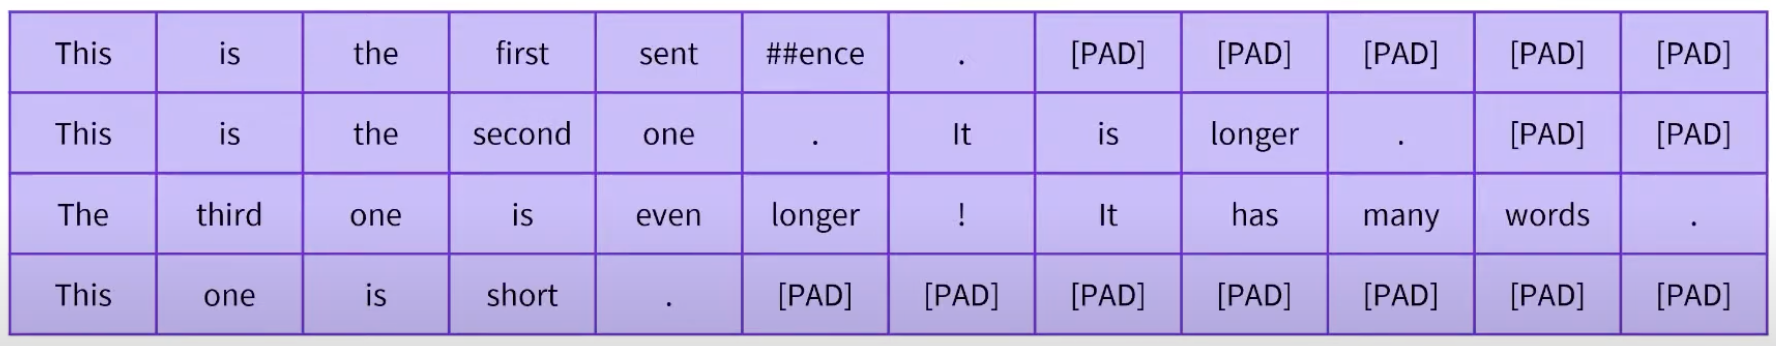

Does this strategy make sense when dealing with a huge dataset? Should we pad in accordance with the longest sentence in the entire dataset?

Pros:
- All batches in a dataset will have same length.

Cons:
- Lots of batches will have useless columns with pad tokens only.

Alternate: Pad sentences at the time of batch creation only. This is called **dynamic padding**.

Pros:
- All batches will have the smallest size possible.

Cons:
- Dynamic shapes don't work well on accelerators (GPUs, TPUs).

## Standard Padding

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

raw_datasets = load_dataset("glue", "mrpc")

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], padding="max_length", max_length=128)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=16)

for step, batch in enumerate(train_dataloader):
  print(batch["input_ids"].shape) # fixed shape
  if step > 5:
    break

torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])


## Dynamic Padding

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

raw_datasets = load_dataset("glue", "mrpc")

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

The padding is postponed to the preprocessing step.

In [ ]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=16, collate_fn=data_collator)

for step, batch in enumerate(train_dataloader):
  print(batch["input_ids"].shape) # fixed shape
  if step > 5:
    break

torch.Size([16, 83])
torch.Size([16, 69])
torch.Size([16, 103])
torch.Size([16, 77])
torch.Size([16, 75])
torch.Size([16, 81])
torch.Size([16, 70])


# The Trainer API

Easily fine-tune (a pre-trained model) or train (from scratch) transformer models

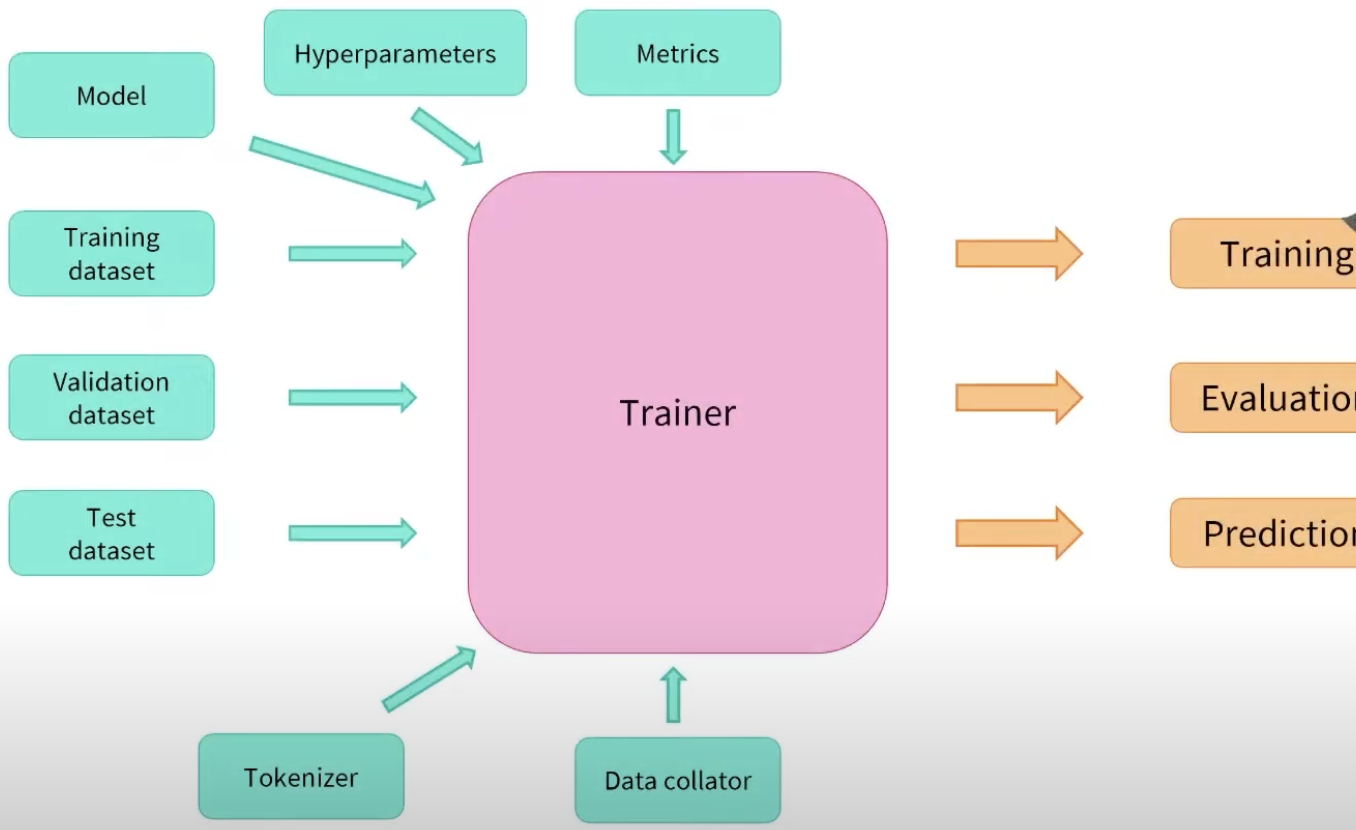

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Let's define a model, and its training arguments.

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Basic training args

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments("abc") # folder where results, evaluations and checkpoints are stored

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=no,
evaluation_strategy=None,
fp16=False,
fp16_backend=auto,
fp16

More detail: https://huggingface.co/docs/transformers/v4.19.4/en/main_classes/trainer#transformers.TrainingArguments

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments("test-trainer",
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=16,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  weight_decay=0.01)

## Trainer

In [ ]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import evaluate
import numpy as np
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train() # will take a lot of time

TrainOutput(global_step=1150, training_loss=0.23601405931555708, metrics={'train_runtime': 311.8646, 'train_samples_per_second': 58.808, 'train_steps_per_second': 3.687, 'total_flos': 714950848507680.0, 'train_loss': 0.23601405931555708, 'epoch': 5.0})

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(408, 2) (408,)
